## Diamonds dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds for data analysis and visualization.

Analyze diamonds by their cut, color, clarity, price, and other attributes
to predict the price


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
from sklearn import svm,preprocessing


In [4]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

### Feature engineering
1.Lets deal with categorical data

2.Drop the unnamed column (dont need it)

In [6]:
'''We could just encode numerically with no particular order

   But we re using a linear model and not classification

   hence the underlying data should make sense'''

#data['cut'].astype('category').cat.codes

'We could just encode numerically with no particular order\n\n   But we re using a linear model and not classification\n\n   hence the underlying data should make sense'

In [7]:
#Lets create a dictionary instead
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
cut_dict={'Ideal':1,'Premium':2,'Very Good':3,'Good':4,'Fair':5}
data['cut']=data['cut'].map(cut_dict)

In [9]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
color_dict={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}
data['color']=data['color'].map(color_dict)

In [11]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [12]:
clarity_dict={'l3':1,'I2':2,'I1':3,'S12':4,'SI1':5,'VS2':6,'VS1':7,'VVS2':8,'VVS1':9}
data['clarity']=data['clarity'].map(clarity_dict)

# Data Visualization
Lets see the relationship between diffrent features in our dataset

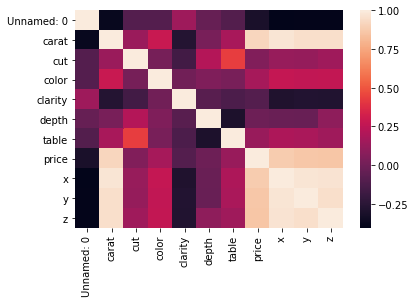

In [13]:
sns.heatmap(data.corr())

### Features and Lables

In [19]:
X = data.drop(["price"],axis=1).values
#X = preprocessing.scale(X)
y = data['price'].values

In [15]:
'''test_size = 200
X_train = X[:-test_size]
y_train = y[:-test_size]


X_test = X[-test_size:]
y_test = y[-test_size:]'''


'test_size = 200\nX_train = X[:-test_size]\ny_train = y[:-test_size]\n\n\nX_test = X[-test_size:]\ny_test = y[-test_size:]'

In [23]:
 X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=200)


## Cleaning the data to fit the model
* Create a function to clean the dataset of nan,Inf and missing cells (skewed datasets)

* fitting the model raised ValueError: Input contains NaN, infinity or a value too large for dtype('float64')

In [21]:

def clean_dataset(data):
    assert isinstance(data, pd.DataFrame), "df needs to be a pd.DataFrame"
    data.dropna(inplace=True)
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    return data[indices_to_keep].astype(np.float64)
clean_dataset(data)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
1,2.0,0.21,2.0,2.0,5.0,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,4.0,2.0,7.0,56.9,65.0,327.0,4.05,4.07,2.31
3,4.0,0.29,2.0,6.0,6.0,62.4,58.0,334.0,4.20,4.23,2.63
5,6.0,0.24,3.0,7.0,8.0,62.8,57.0,336.0,3.94,3.96,2.48
6,7.0,0.24,3.0,6.0,9.0,62.3,57.0,336.0,3.95,3.98,2.47
7,8.0,0.26,3.0,5.0,5.0,61.9,55.0,337.0,4.07,4.11,2.53
8,9.0,0.22,5.0,2.0,6.0,65.1,61.0,337.0,3.87,3.78,2.49
9,10.0,0.23,3.0,5.0,7.0,59.4,61.0,338.0,4.00,4.05,2.39
10,11.0,0.30,4.0,7.0,5.0,64.0,55.0,339.0,4.25,4.28,2.73
11,12.0,0.23,1.0,7.0,7.0,62.8,56.0,340.0,3.93,3.90,2.46


In [ ]:
#%%timeit
model = svm.SVR(kernel='linear')
model.fit(X_train,y_train)


### Lets view what exactly the model predicted
* 200 test variables

In [ ]:
#for X,y in zip(X_test,y_test):
#    print("model:{} ,actual:{}".format(model.predict([X])[0],y))

* using rbf kernel

In [ ]:
#clf = svm.SVR(kernel ='rbf')

In [ ]:
#clf.fit(X_train,y_train)

In [ ]:
#clf.score(X_test,y_test)

In [ ]:

'''for X,y in zip(X_test,y_test):
    print(f'model:{clf.predict([X])[0]},Actual:{y}')'''